### JHESORLEY M. LAID
### MIT-2

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pywt
import time

import warnings
warnings.filterwarnings("ignore")

In [10]:
def stream_generator(size=200):
    return np.random.randint(0, 100, size)

In [11]:
stream_data = stream_generator()

In [12]:
#DATA REDUCTION — DIVIDE & CONQUER STRATEGY

In [13]:
def divide_and_conquer(data, block_size=10):
    return [
        np.mean(data[i:i + block_size])
        for i in range(0, len(data), block_size)
    ]

In [14]:
dc_summary = divide_and_conquer(stream_data)

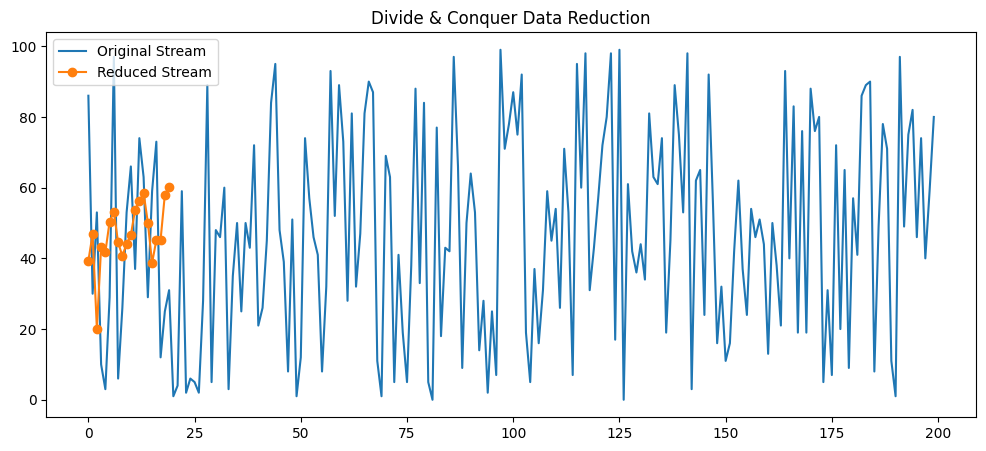

In [15]:
# Create figure with size (optional)
fig, ax = plt.subplots(figsize=(12, 5))

# Plot original stream (lines only)
ax.plot(stream_data, label="Original Stream")

# Plot reduced stream (lines + markers)
ax.plot(dc_summary, marker='o', label="Reduced Stream")

# Title
ax.set_title("Divide & Conquer Data Reduction")

# Legend
ax.legend()

# Show plot
plt.show()

In [18]:
#BALANCED BINARY TREE (HIERARCHICAL AGGREGATION)

In [19]:
tree = [10]

In [20]:
def build_binary_tree(data):
    tree = [data]
    while len(data) > 1:
        data = [
            np.mean(data[i:i + 2])
            for i in range(0, len(data), 2)
        ]
        tree.append(data)
    return tree

In [43]:
binary_tree = build_binary_tree(stream_data)

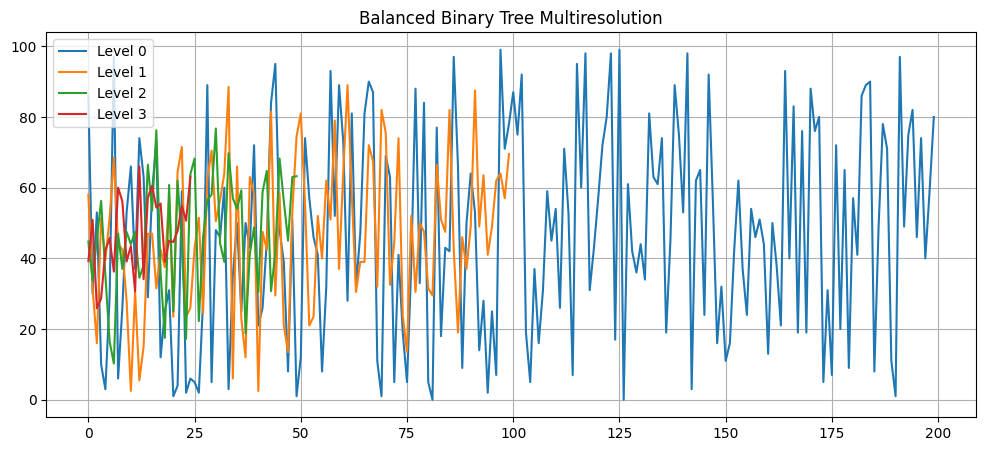

In [35]:
# Create figure
fig, ax = plt.subplots(figsize=(12, 5))

# Loop through first 4 levels
for i, level in enumerate(binary_tree[:4]):
    ax.plot(level, label=f"Level {i}")

# Title
ax.set_title("Balanced Binary Tree Multiresolution")

# Legend
ax.legend()

# Optional: grid (to make it look cleaner like Plotly)
ax.grid(True)

# Show plot
plt.show()

In [36]:
#CLUSTERING METHOD — CF-TREE (BIRCH-LIKE IDEA)

In [37]:
class CFNode:
    def __init__(self):
        self.n = 0
        self.sum = 0

    def add(self, value):
        self.n += 1
        self.sum += value

    def centroid(self):
        return self.sum / self.n if self.n > 0 else 0

In [38]:
cf_tree = [CFNode() for _ in range(10)]

for value in stream_data:
    index = value // 10
    cf_tree[index].add(value)

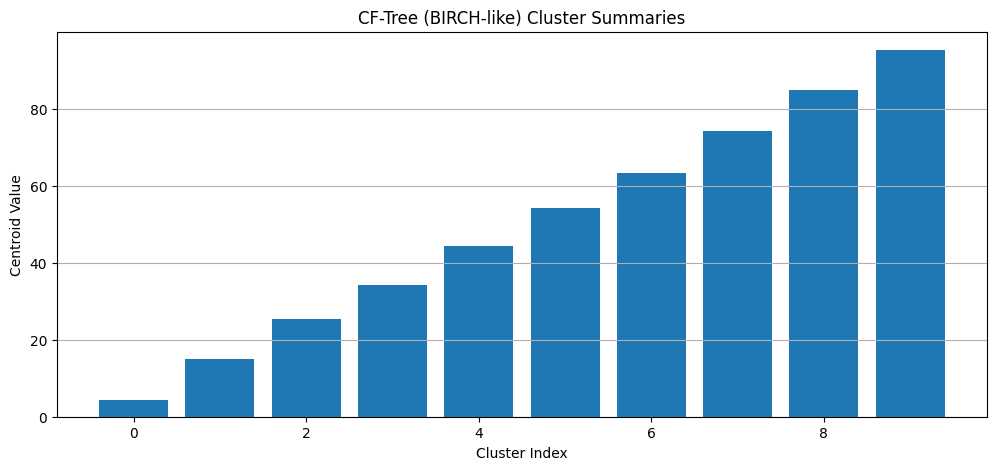

In [39]:
centroids = [node.centroid() for node in cf_tree]

# Create figure with size
fig, ax = plt.subplots(figsize=(12, 5))

# Bar chart
ax.bar(list(range(10)), centroids, width=0.8)

# Title and labels
ax.set_title("CF-Tree (BIRCH-like) Cluster Summaries")
ax.set_xlabel("Cluster Index")
ax.set_ylabel("Centroid Value")

# Optional: grid for better readability
ax.grid(True, axis='y')

# Show plot
plt.show()

In [40]:
#WAVELETS — MULTI-SCALE SIGNAL DECOMPOSITION

In [41]:
coeffs = pywt.wavedec(stream_data, wavelet="haar", level=3)

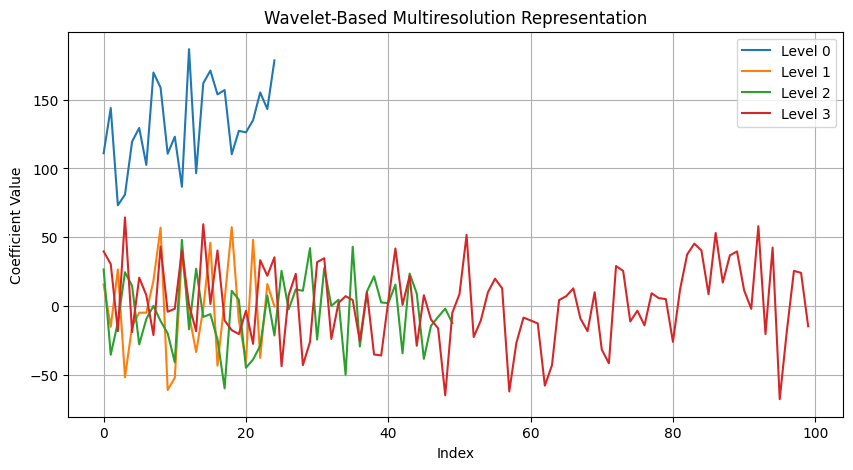

In [42]:
# Create figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot each wavelet coefficient level
for i, coeff in enumerate(coeffs):
    ax.plot(coeff, label=f"Level {i}")

# Title
ax.set_title("Wavelet-Based Multiresolution Representation")

# Labels (optional but recommended)
ax.set_xlabel("Index")
ax.set_ylabel("Coefficient Value")

# Legend
ax.legend()

# Optional: add grid for readability
ax.grid(True)

# Show plot
plt.show()